In [5]:
import matplotlib
%matplotlib inline
import urllib.request
import time
import math
import json
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle as pkl

def query_google(word):
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
    headers = { 'User-Agent' : user_agent }
    query = 'https://www.google.com/search?client=firefox-b-d&q=' + word
    req = urllib.request.Request(query, headers = headers)
    
    file = urllib.request.urlopen(req)
    f = file.read().decode('utf-8')
    count = None
    if "About" in f:
        l = re.findall(r'About ([0-9]+(,[0-9]+)+) results', f)
#         print(l[0])
        count = int(l[0][0].replace(',',''))
    #print(f)
#     print(f)
    time.sleep(2)
#     soup = BeautifulSoup(f, "html.parser")
#     print(soup)
#     count = 0
#     for link in soup.find_all('a'):
#         count+=1
        #print(link.get('href'))
    return count

# query_google('love+sex')
# print(query_google('sex'))

In [6]:
def calculate_NGD(words):
    word1, word2 = words
    len_N = 30000000000000
    len_word1 = query_google(word1)
    len_word2 = query_google(word2)
    len_word1_word2 = query_google(word1+'+'+word2)
    ngd = (max(math.log(len_word1),math.log(len_word2)) - math.log(len_word1_word2))/(math.log(len_N) - min(math.log(len_word1),math.log(len_word2)))
    return ngd

In [38]:
calculate_NGD(('Arafat','Jackson'))

0.4126064021575785

In [47]:
with open('combined.csv', 'r') as f:
    data=f.read()
    data = data.split('\n')
    data.pop()
    data = data[1:]
    word1 = [x.split(',')[0] for x in data]
    word2 = [x.split(',')[1] for x in data]
    scores = [float(x.split(',')[2]) for x in data]
    
    words = list(zip(word1, word2))
    
    ngd_scores = list(map(calculate_NGD, words))


KeyboardInterrupt: 

In [12]:
import numpy as np
import pickle as pkl

def plot(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)

    words = data['words']
    ngd_scores = data['ngd']
    with open('combined.csv', 'r') as f:
        data=f.read()
        data = data.split('\n')
        data.pop()
        data = data[1:]
        word1 = [x.split(',')[0] for x in data]
        word2 = [x.split(',')[1] for x in data]
        scores = [float(x.split(',')[2]) for x in data]

    scores = np.asarray(scores)
    ngd_scores = np.asarray(ngd_scores)
    
    ngd_scores = np.absolute(ngd_scores)
    ngd_scores = ngd_scores - np.min(ngd_scores)
    ngd_scores = ngd_scores/np.max(ngd_scores)*10.0
    ngd_scores = 10.0 - ngd_scores
    
    plt.scatter(scores, ngd_scores, facecolors='none', edgecolors='b')
    plt.xlabel('Human similarity ratings')
    plt.ylabel('Scaled NGD')
    plt.show()

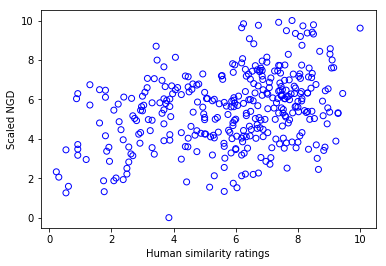

In [13]:
plot('ngd_scores.pkl')

In [7]:
with open('ngd_scores.pkl', 'rb') as f:
    data = pkl.load(f)
    print(data['ngd'][2], data['words'][2])

0.02751811639383973 ('tiger', 'tiger')
